<a href="https://colab.research.google.com/github/covillarreal/AprendizajeAutomatico/blob/main/TP4_AA1_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 AA1 + TP4 AA1

**CONSTANZA VILLARREAL**

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

#**TP1: Aplicación de Regresión Lineal y Análisis de Importancia de Variables**  
**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.  



## **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets/?Task=Regression&skip=0&take=10&sort=desc&orderBy=NumHits&search=  
   - Requisitos:  
     - Debe tener al menos 4 variables numéricas continuas (1 target, 3 o más features).  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.

DATASET a utilizar: [Computer Hardware](https://archive.ics.uci.edu/dataset/29/computer+hardware)

**BREVE DESCRIPCION DE CADA FEATURE:**
* Nombre del proveedor: Asesor, Amdahl, Apollo, BASF, BTI, Burroughs,etc.
* Nombre del modelo: muchos simbolos unicos.
* MICT: tiempo de ciclo de la máquina	en nanosegundos.
* MMIN: memoria principal mínima	en kilobytes.
* MMÁXIMO: memoria principal máxima	en kilobytes.
* Caché: memoria caché en kilobytes.
* CHMIN: canales minimos en unidades.
* CHMAX: canales maximos en unidades.
* PRP: rendimiento relativo publicado.
* Planificación de recursos empresariales (ERP)	: rendimiento relativo estimado del artículo original.

## Resolución:


## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - **Pregunta clave**: ¿Qué relaciones lineales preliminares observan?  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance

# Cargar el dataset
df = pd.read_csv("machine.data.csv")

# Mostrar las primeras filas del dataset para ver las variables
df.head()

,adviser,32/60,125,256,6000,256.1,16,128,198,199
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


1. Importo las librerías necesarias:

* *pandas* para manejar datos en formato de tablas.

* *numpy* para trabajar con arreglos numéricos.

* *matplotlib.pyplot* y seaborn para crear gráficos.

2. Cargo el dataset:

* Lee el archivo "machine.data.csv" que contiene los datos y lo guarda en el DataFrame *df*.

3. Muestro las primeras filas del dataset:

* Usa *df.head()* para imprimir las primeras 5 filas del archivo, lo cual te permite ver las variables y una pequeña muestra de los datos.

In [2]:
# Como las columnas no tienen nombres les asigno uno
df.columns = ['Nombre Vendedor', 'Nombre Modelo', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']

# Mostrar las primeras filas con nombres de columnas asignados
df.head()

,Nombre Vendedor,Nombre Modelo,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


1. Asigno nombres a las columnas:

* Como el dataset no tiene nombres de columnas, se les asigna un nombre descriptivo a cada una de las columnas utilizando *df.columns*.

* Los nombres que asigna son: 'VendorName', 'ModelName', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP'.

2. Muestro las primeras filas con los nombres de las columnas asignados:

* Usa *df.head()* para mostrar las primeras 5 filas del dataset con los nuevos nombres de columnas.

Es útil para poder trabajar con el dataset de manera más clara, ya que ahora puedes referirte a las columnas por su nombre en lugar de por índices numéricos

In [3]:
df.info

<bound method DataFrame.info of     Nombre Vendedor  Nombre Modelo  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  \
0            amdahl         470v/7    29  8000  32000    32      8     32   
1            amdahl        470v/7a    29  8000  32000    32      8     32   
2            amdahl        470v/7b    29  8000  32000    32      8     32   
3            amdahl        470v/7c    29  8000  16000    32      8     16   
4            amdahl         470v/b    26  8000  32000    64      8     32   
..              ...            ...   ...   ...    ...   ...    ...    ...   
203          sperry           80/8   124  1000   8000     0      1      8   
204          sperry  90/80-model-3    98  1000   8000    32      2      8   
205          sratus             32   125  2000   8000     0      2     14   
206            wang         vs-100   480   512   8000    32      0      0   
207            wang          vs-90   480  1000   4000     0      0      0   

     PRP  ERP  
0    269  253  
1    220  253  
2    172  253  
3    132  132  
4    318  290  
..   ...  ...  
203   42   37  
204   46   50  
205   52   41  
206   67   47  
207   45   25  

[208 rows x 10 columns]>

Muestra una descripción estadística de las variables numéricas:

* df.describe() genera un resumen con estadísticas descriptivas de las columnas numéricas del dataset.

* Entre las estadísticas que muestra están:

  * Count: Número de valores no nulos.

  * Mean: Promedio de los valores.

  * Std: Desviación estándar, que indica la dispersión de los valores.

  * Min: Valor mínimo.

  * 25%: Cuartil 1 (el 25% de los valores son menores a este valor).

  * 50%: Mediana (el 50% de los valores son menores a este valor).

  * 75%: Cuartil 3 (el 75% de los valores son menores a este valor).

  * Max: Valor máximo.

In [4]:
# Descripción estadística de las variables numéricas
df.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,204.201923,2880.538462,11824.019231,24.096154,4.644231,17.740385,105.177885,98.850962
std,260.833016,3883.839300,11747.916663,37.417999,6.787198,24.913375,161.090223,154.974961
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,49.500000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,111.500000,99.500000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


**Algunas conclusiones generales:**

📊 208 instancias, 8 variables numéricas.

📉 Hay gran dispersión en varias variables (ej. MYCT, MMAX, CACH, etc.).

🧨 Outliers posibles: muchas variables tienen valores extremos (ej. CACH llega a 256, pero su 75% está en 32).

⚖️ Escalas muy distintas entre variables → va a ser necesario escalar los datos.

0️⃣ Algunas columnas tienen valores 0 (como CACH, CHMIN)

🎯 PRP y ERP parecen ser los targets

🧮 Distribuciones asimétricas (media ≠ mediana en varios casos)

Verifica la presencia de valores faltantes en el dataset:

* *df.isnull().sum()* suma los valores True (que representan los valores faltantes) por cada columna, mostrando cuántos valores faltantes hay en cada una de las columnas del dataset.

Este paso es importante porque te permite identificar qué columnas tienen datos faltantes y cuántos, lo cual es útil para decidir cómo manejar esos valores (por ejemplo, imputándolos, eliminándolos, etc.).

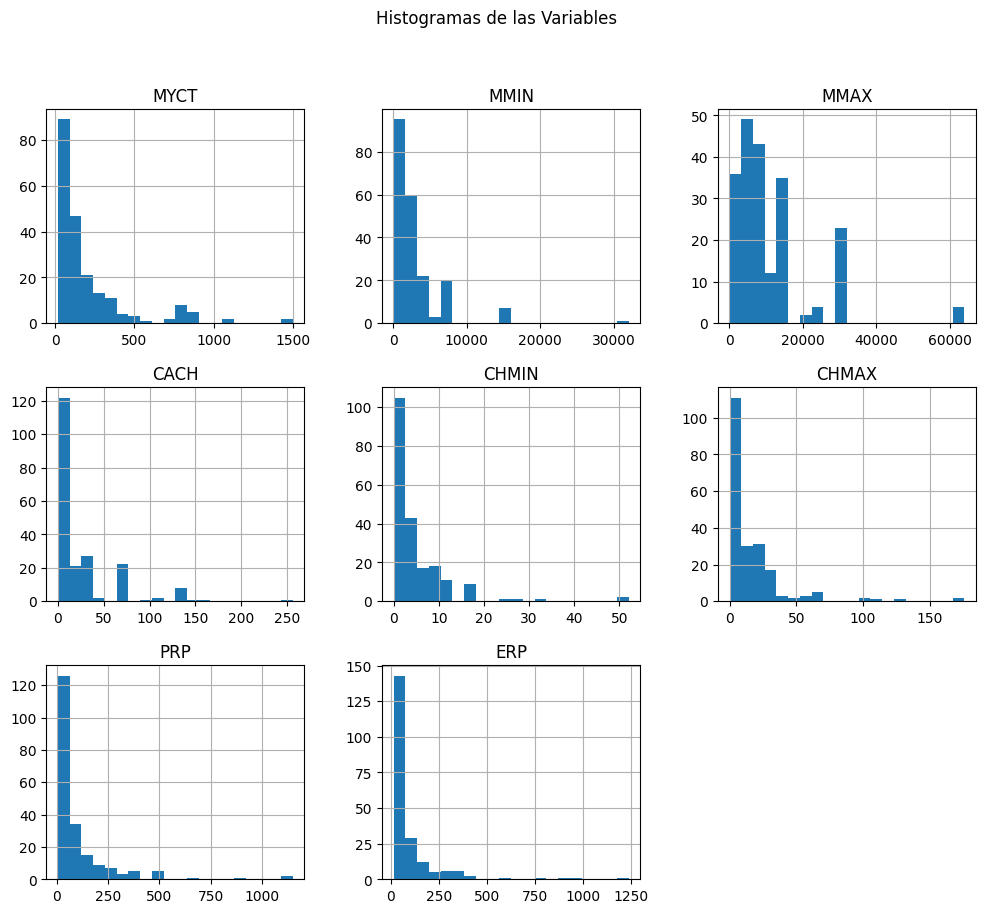

In [5]:
# Visualización de histogramas para cada variable numérica
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histogramas de las Variables")
plt.show()

Genero histogramas para cada variable numérica en el dataset:

* *df.hist(figsize=(12, 10), bins=20)* crea un histograma para cada columna numérica del DataFrame *df*.

  * *figsize=(12, 10)* define el tamaño de la figura que contendrá todos los histogramas.

  * *bins=20* establece que cada histograma tendrá 20 barras (o intervalos) para representar la distribución de los datos.

* *plt.suptitle("Histogramas de las Variables")* agrega un título general para todos los histogramas.

* *plt.show()* muestra los gráficos generados.

Los histogramas permiten visualizar la distribución de los datos en cada variable numérica, ayudando a identificar patrones, sesgos, distribuciones simétricas o asimétricas, y la presencia de posibles valores atípicos (outliers)

Puedo observar que hay muchos outliers entonces con Z-Score voy a tratar de encontrarlos

In [6]:
df_num = df.select_dtypes(include=[np.number]) # tomo solo las variables numericas
z_scores = (df_num- df_num.mean()) / df_num.std()
outliers_z = np.abs(z_scores) > 3
print('Cantidad de outliers por variable:')
print(outliers_z.sum())


Cantidad de outliers por variable:
MYCT     4
MMIN     8
MMAX     4
CACH     3
CHMIN    4
CHMAX    6
PRP      4
ERP      5
dtype: int64


**Distribuciones muy asimétricas (sesgadas a la derecha):**

* Todas las variables tienen valores concentrados a la izquierda y unos pocos valores muy altos (distribución sesgada positivamente).

* Esto explica por qué el método de Z-Score detecta algunos outliers, especialmente en:

  * MMIN, CHMAX, ERP y MMAX.

**Variables con más outliers:**

* MMIN (8 outliers), CHMAX (6), ERP (5): podrían tener observaciones extremas que impacten el modelo.

**Variables con menor dispersión pero también outliers:**

* MYCT, CACH, CHMIN, PRP: tienen 3 a 4 outliers. Aunque no son muchas, pueden influir en modelos sensibles como regresión lineal.

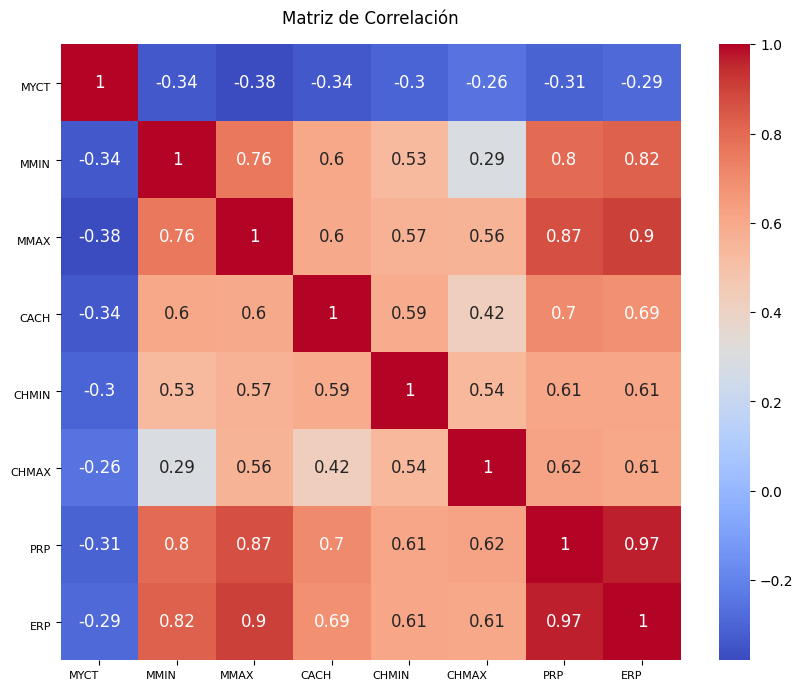

In [7]:
correlation = df_num.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', annot_kws={"size": 12})
plt.title('Matriz de Correlación', pad=15)
plt.xticks(rotation=360, ha='right', fontsize=8)   # rotar los label a 360 grados y alinear su texto
plt.yticks(rotation=0, va='top', fontsize=8)     # rotar los label a 0 grados y alinear su texto
plt.show()

Elegí **PRP (Published Relative Performance)** como objetivo porque es una medida directa del rendimiento de las máquinas, lo que la hace una variable más clara y confiable para predecir. Al ser un valor numérico que refleja el desempeño real, facilita el análisis y modelado de las relaciones con las otras características de las máquinas. Esto hace que sea una opción más sencilla y adecuada para construir un modelo de regresión.










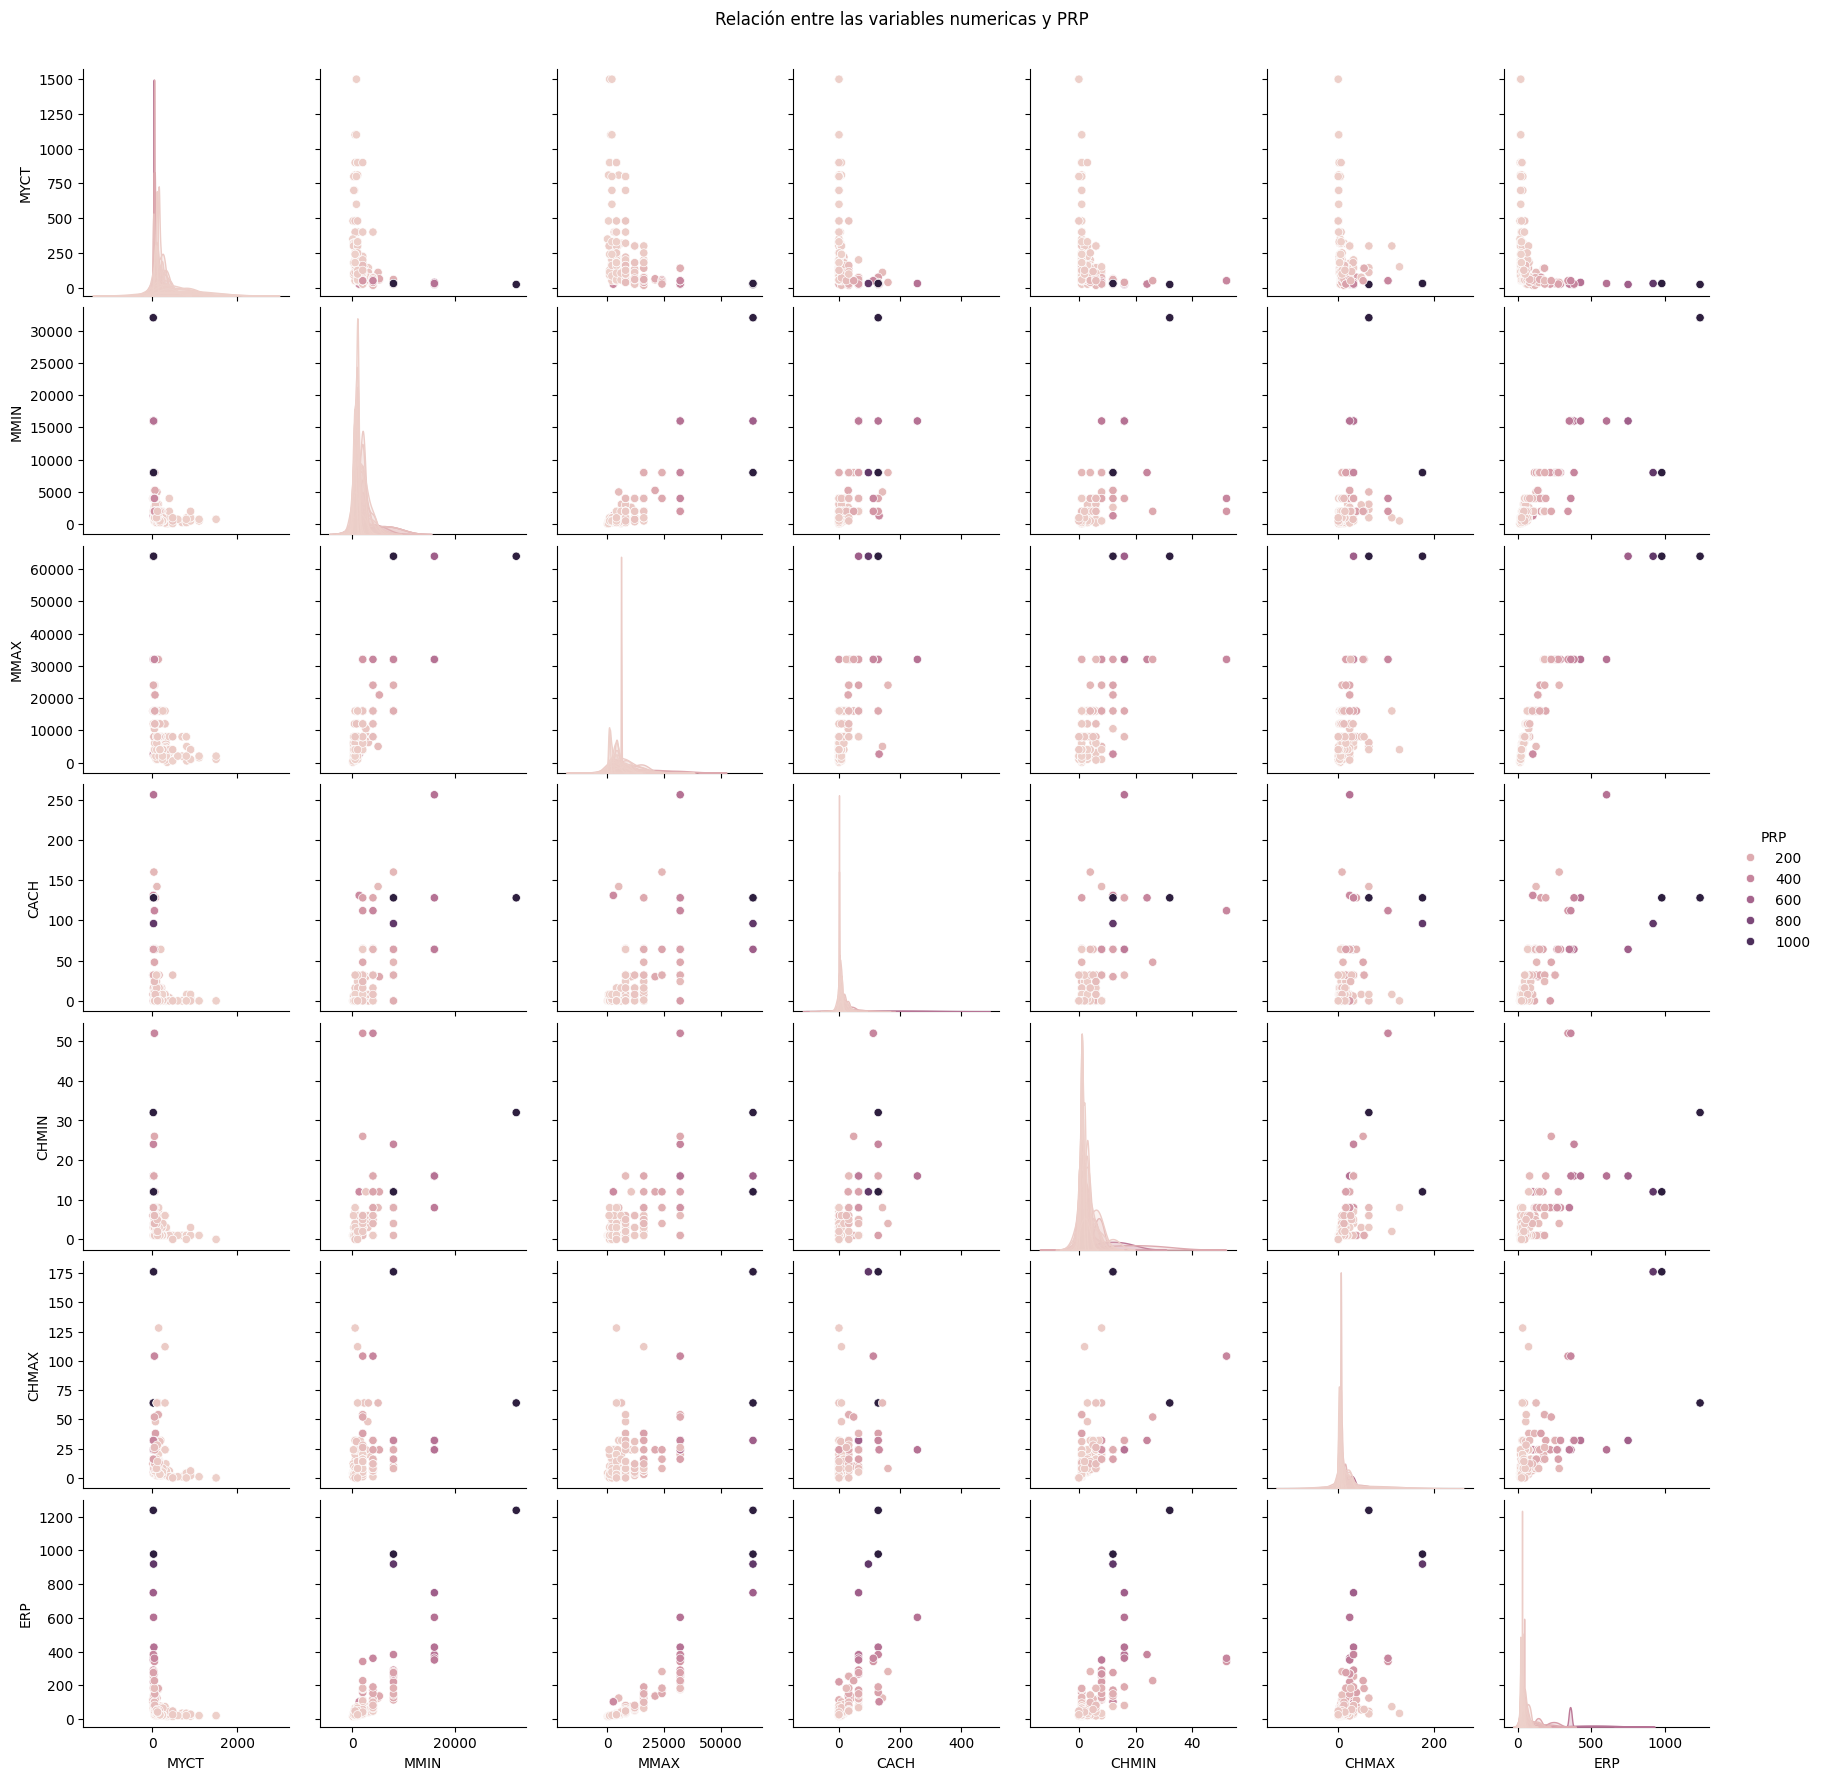

In [8]:
# Gráfico de pares con nombres de columnas
sns.pairplot(df_num, hue='PRP')
plt.suptitle("Relación entre las variables numericas y PRP", y=1.02)
plt.show()

📈 **Variables con fuerte correlación positiva con PRP**

Estas variables tienen valores altos de correlación y se espera que al aumentar, también aumente el rendimiento (PRP):

* MMAX (r = 0.87) -> Memoria máxima: a mayor capacidad, mayor rendimiento.

* MMIN (r = 0.80) -> Memoria mínima también impacta positivamente.

* CHMAX y CHMIN (r aprox 0.61) -> Canales máximos y mínimos tienen un efecto positivo, aunque más moderado.

* CACH (r = 0.70) -> Tamaño de caché influye notablemente en el rendimiento.

* ERP (r = 0.97) -> Altamente correlacionada con PRP. Es probable que sea una versión alternativa del mismo dato, por lo que puede ser redundante.

🔻 **Variable con correlación negativa**
* MYCT (r = -0.31) -> Tiempo de ciclo de la máquina: cuanto mayor es, menor es el rendimiento. Tiene una relación inversa moderada.

❌ **Posibles relaciones nulas o muy débiles**

No se observan relaciones completamente nulas, pero MYCT y CHMAX tienen correlaciones bajas en valor absoluto.

🔍 **Pairplot: Confirmaciones visuales**

* Se observa cómo ERP y PRP están casi alineadas -> relación muy fuerte.

* Las variables MMAX, MMIN y CACH muestran nubes de puntos con tendencia ascendente frente a PRP.

* MYCT tiene una nube de puntos con tendencia descendente -> confirma la correlación negativa.

📌 **Conclusión final**

La elección de PRP como objetivo es adecuada porque:

* Está bien correlacionado con múltiples variables técnicas.

* Presenta relaciones tanto positivas como negativas que pueden ser tomadas por modelos de regresión.


Es importante tener en cuenta que estas *son observaciones preliminares*.

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Escalen las features (p.ej., StandardScaler) para comparar coeficientes después.  
   - Dividan en train/test (70-30 o 80-20).  

**1. Limpieza de datos**

Verificamos con df.isnull().sum() y vimos que no hay valores faltantes, así que no es necesario eliminar ni imputar datos.

¿Qué pasa con los outliers? En los histogramas ya visualicé que hay algunos outliers. Por ahora no los eliminaré, a menos que luego vea que afectan mucho al modelo. Se pueden dejar si no son errores.

In [9]:
# Verificar valores faltantes
print(df.isnull().sum())

Nombre Vendedor    0
Nombre Modelo      0
MYCT               0
MMIN               0
MMAX               0
CACH               0
CHMIN              0
CHMAX              0
PRP                0
ERP                0
dtype: int64


**2. Selección de features**

Voy a descartar las variables categóricas: VendorName y ModelName. La justificación es porque tienen muchos valores únicos y no aportan directamente al rendimiento numérico (PRP).Tampoco utilizare ERP ya que esta altamente correlacionada con PRP y es probable que sea una versión alternativa del mismo dato. Además, mi objetivo es simplificar el modelo en esta etapa.

**3. Variables categóricas**

No usaré variables categóricas por ahora, para mantener un modelo sencillo de regresión lineal.

**4. Escalado de las features**

Usaré StandardScaler para estandarizar las variables numéricas.

¿Por qué? Porque quiero que todas las features tengan una escala similar. Esto:

* Mejora el rendimiento de algunos modelos.

* Permite comparar los coeficientes más fácilmente.

**5. División en conjunto de entrenamiento y prueba**

Usaré una división 80-20:

* 80% de los datos para entrenar el modelo.

* 20% para evaluarlo.


In [10]:
# Importo las librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Elimino columnas categóricas que no voy a usar
df_num = df.drop(columns=['Nombre Vendedor', 'Nombre Modelo', 'ERP'])  # Solo dejo variables numéricas

# Separo features (X) y target (y)
X = df_num.drop(columns=['PRP'])  # Todas las columnas menos PRP
y = df_num['PRP']  # Esta es nuestra variable objetivo

# Escalar las variables con StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Mostrar para confirmar
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)


Forma de X_train: (166, 6)
Forma de X_test: (42, 6)


Ese resultado confirma que todo salió bien:

* Tengo 166 muestras para entrenamiento.

* Y 42 muestras para testeo.

* Cada una con 6 features numéricas (ya sin las categóricas,sin la columna PRP que es tu objetivo y sin ERP).




## 4. **Regresión Lineal**  
   - Ajusten un modelo de regresión lineal (usando `sklearn.linear_model.LinearRegression`).  
   - Obtengan:  
     - Coeficientes (pesos) del modelo.  
     - Evaluar métricas en el set de entrenamiento y en el de testeo: **R²**, MSE (error cuadrático medio), MAE.  


Estas bibliotecas nos permiten crear el modelo de regresión lineal y calcular métricas como R2, MSE y MAE.

In [11]:
# Creamos un objeto del modelo de regresión lineal
modelo = LinearRegression() #Acá creamos el modelo vacío, aún no está entrenado

In [12]:
# Entrenamos (ajustamos) el modelo usando los datos de entrenamiento
modelo.fit(X_train, y_train) #El modelo aprende la relación entre las variables predictoras (X_train) y el objetivo (y_train)

LinearRegression()

In [13]:
# Mostramos el intercepto (ordenada al origen) y los coeficientes del modelo
print("Intercepto:", modelo.intercept_) #El valor de PRP cuando todas las variables = 0
print("Coeficientes:", modelo.coef_)

Intercepto: 105.68352071597155
Coeficientes: [14.59551482 65.15069471 50.88800735 52.19415642 -8.88635063 34.64346703]


Esto muestra el peso que el modelo asignó a cada variable. Nos permite interpretar la influencia de cada una en la predicción.



In [14]:
# Hacemos predicciones con el modelo para el conjunto de entrenamiento y test
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

# El modelo ya entrenado predice los valores de PRP tanto en entrenamiento como en prueba.

In [15]:
# Calculamos métricas de rendimiento para el conjunto de entrenamiento
r2_train = r2_score(y_train, y_train_pred)             # Qué tan bien ajusta el modelo (1 es perfecto)
mse_train = mean_squared_error(y_train, y_train_pred)  # Error cuadrático medio (penaliza errores grandes)
mae_train = mean_absolute_error(y_train, y_train_pred) # Error absoluto medio (promedio del error)

# Calculamos métricas para el conjunto de prueba (test)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

Estas métricas me permiten ver si el modelo funciona bien o si está sobreajustado (memoriza entrenamiento y falla en test)

In [16]:
# Mostramos los resultados
print("Train - R²:", r2_train)
print("Train - MSE:", mse_train)
print("Train - MAE:", mae_train)

print("Test - R²:", r2_test)
print("Test - MSE:", mse_test)
print("Test - MAE:", mae_test)

#Comparamos rendimiento en entrenamiento y prueba. Si las métricas son parecidas, el modelo generaliza bien.

Train - R²: 0.8861238527610841
Train - MSE: 2815.185500142832
Train - MAE: 35.84168679109936
Test - R²: 0.7615257551705066
Test - MSE: 7149.217222711684
Test - MAE: 52.97389288378137


**Entrené un modelo de regresión lineal y estos fueron los resultados:**

* En los datos de entrenamiento:

  * El modelo explicó el 89% de la variabilidad del rendimiento (PRP). Esto se ve en el R² = 0.89, lo cual es bastante bueno.

  * El error cuadrático medio (MSE) fue de aproximadamente 2815, y el error absoluto medio (MAE) fue de casi 36. Esto significa que, en promedio, el modelo se equivoca por unas 36 unidades al predecir.

* En los datos de testeo (los que el modelo no vio):

  * El modelo explicó el 76% de la variabilidad (R² = 0.76), así que el rendimiento bajó un poco, pero sigue siendo razonable.

  * El MSE fue más alto (7149) y el MAE también subió a unos 53, lo que muestra que el modelo se equivoca un poco más cuando trabaja con datos nuevos.


## 5. **Importancia de Variables**  -> Lo analicé arriba en el grafico de correlacion
   - Analicen los **coeficientes** del modelo:  
     - Valores absolutos altos → mayor impacto en el target.  
     - Signo: Relación positiva/negativa con el target.  
   - Comparen la magnitud de los coeficientes **escalados** (si usaron features en distintas unidades).  
   - **5.1. Opcional**:
     Otra forma es "desordenar" un feature y ver cómo empeora el modelo. Si al desordenarlo el error aumenta mucho, ese feature era importante. Usen métodos como:  
     - **Permutation Importance** (de sklearn) para validar importancia. Más info en https://scikit-learn.org/stable/modules/permutation_importance.html



In [17]:
# Como habia guardado los nombres de las columnas antes del escalado
feature_names = ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']  # actualizar si lo llego a cambiar

# Ver los coeficientes
coeficientes = pd.Series(modelo.coef_, index=feature_names)
print(coeficientes.sort_values(ascending=False))

MMIN     65.150695
CACH     52.194156
MMAX     50.888007
CHMAX    34.643467
MYCT     14.595515
CHMIN    -8.886351
dtype: float64


**Interpretación de los coeficientes:** -> Igual que lo que analizamos en el grafico de correlacion mas arriba

* CACH: Esta variable tiene un coeficiente positivo. Un aumento en CACH (memoria caché) también aumenta el PRP, aunque no tanto como el ERP.

* CHMAX: Tiene un coeficiente positivo, lo que indica que un mayor número de canales máximos mejora el PRP, pero el impacto es menor comparado con ERP y CACH.

* MMIN: Al igual que las anteriores, un aumento en la memoria mínima también tiene un efecto positivo sobre el PRP, pero es menor en comparación con CACH y ERP.

* MYCT: Este coeficiente es negativo, lo que indica que un mayor tiempo de ciclo de la máquina (MYCT) reduce el PRP. Es decir, más tiempo de ciclo implica peor rendimiento relativo.

* CHMIN: CHMIN (canales mínimos) tiene un coeficiente negativo, lo que sugiere que menos canales tienden a disminuir el PRP.

* MMAX: La memoria máxima tiene un coeficiente negativo, lo que puede ser algo sorprendente a primera vista. Esto sugiere que, en este modelo, un aumento en la memoria máxima está asociado a una reducción en el PRP, lo cual puede deberse a que no hay una relación directa o que el modelo ha aprendido otras interacciones que no son tan evidentes.

**Resumen:**
* Variables con impacto positivo: CACH, CHMAX, MMIN.

* Variables con impacto negativo: MYCT, CHMIN, MMAX.

* Mayor impacto en PRP: ERP tiene el mayor coeficiente, seguido por CACH.


## 6. **Reflexión**  
   - ¿Cuáles variables son más importantes según el modelo? ¿Coincide con su análisis exploratorio?  
   - ¿El modelo tiene buen rendimiento (R² alto, MSE bajo)? Si no, ¿a qué podría deberse?  



1. 1. ¿Cuáles variables son más importantes según el modelo?

Según los coeficientes obtenidos, la variable más importante es CACH con un impacto positivo.

Las variables que tienen un coeficiente positivo son CACH, CHMAX, y MMIN, mientras que las negativas son MYCT, CHMIN, y MMAX. En general, ERP y CACH parecen ser las variables más relevantes para predecir el rendimiento, mientras que MMAX tiene un coeficiente negativo que puede parecer sorprendente y debería ser analizado más a fondo (posiblemente debido a interacciones no lineales o efectos colaterales que el modelo ha aprendido).

1. 2. ¿Coincide con su análisis exploratorio?

El análisis exploratorio me permitió observar las distribuciones y las relaciones preliminares entre las características y el objetivo. Al observar los coeficientes y su relación con el PRP:

* En el análisis exploratorio se vio que algunas variables parecían tener una relación directa con el rendimiento, como CACH, lo cual coincide con los resultados obtenidos en el modelo.

* Sin embargo, algunas variables como MMAX tienen un comportamiento inesperado (coeficiente negativo), lo que podría no haber sido evidente en el análisis exploratorio. Esto podría deberse a interacciones complejas entre las características que el modelo de regresión ha capturado.

2. ¿El modelo tiene buen rendimiento (R² alto, MSE bajo)?

* R²: El modelo tiene un R² bastante alto, lo que significa que explica una gran parte de la variabilidad en el PRP. Sin embargo, hay una caída de R² al pasar del entrenamiento al test, lo que sugiere que el modelo se ajustó muy bien a los datos de entrenamiento pero tiene algo de overfitting.

* MSE: El MSE es bajo en entrenamiento, pero aumenta considerablemente en el conjunto de prueba, lo que refuerza la idea de overfitting. El modelo funciona muy bien con los datos con los que fue entrenado, pero no generaliza tan bien en datos no vistos.

Posibles razones para el rendimiento:

* Overfitting: El modelo ha aprendido demasiado bien los datos de entrenamiento, incluyendo el ruido.

* Características colineales: Algunas de las variables pueden estar correlacionadas entre sí, lo que puede afectar la capacidad del modelo para generalizar correctamente.

* Outliers: La presencia de outliers podría haber afectado el rendimiento del modelo, especialmente porque estamos trabajando con regresión lineal, que es sensible a los valores extremos.

Mejoras posibles:

* Regularización: Podríamos aplicar Ridge o Lasso para penalizar los coeficientes grandes y evitar el overfitting.

* Validación cruzada: Usar cross-validation para evaluar el modelo de manera más robusta.

* Exploración de interacciones: Considerar si las relaciones entre las variables son realmente lineales o si se deben explorar interacciones o transformaciones adicionales.

* Tratamiento de outliers: Identificar y tratar los outliers de manera adecuada.

En resumen, el modelo tiene un buen rendimiento en términos de R², pero hay signos de overfitting, lo que hace que el rendimiento en los datos de prueba no sea tan bueno como en los de entrenamiento. Podría mejorar el modelo con técnicas adicionales de regularización y validación cruzada.


## **Bonus**:  
- Prueben eliminar variables "poco importantes" y reentrenar el modelo. ¿Mejora el rendimiento?  

In [18]:
# Convertimos las matrices de numpy a DataFrame
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Eliminamos las columnas poco importantes ('MMAX', 'CHMIN')
X_train_reducido = X_train_df.drop(columns=['MMAX', 'CHMIN'])
X_test_reducido = X_test_df.drop(columns=['MMAX', 'CHMIN'])

# Reentrenamos el modelo con las variables reducidas
modelo_reducido = LinearRegression()
modelo_reducido.fit(X_train_reducido, y_train)

# Evaluamos el rendimiento del modelo reducido
y_train_pred_reducido = modelo_reducido.predict(X_train_reducido)
y_test_pred_reducido = modelo_reducido.predict(X_test_reducido)

# Cálculo de las métricas para el modelo reducido
r2_train_reducido = r2_score(y_train, y_train_pred_reducido)
mse_train_reducido = mean_squared_error(y_train, y_train_pred_reducido)
mae_train_reducido = mean_absolute_error(y_train, y_train_pred_reducido)

r2_test_reducido = r2_score(y_test, y_test_pred_reducido)
mse_test_reducido = mean_squared_error(y_test, y_test_pred_reducido)
mae_test_reducido = mean_absolute_error(y_test, y_test_pred_reducido)

# Resultados para el modelo reducido
print("Modelo Reducido")
print(f"Train - R²: {r2_train_reducido}")
print(f"Train - MSE: {mse_train_reducido}")
print(f"Train - MAE: {mae_train_reducido}")
print(f"Test - R²: {r2_test_reducido}")
print(f"Test - MSE: {mse_test_reducido}")
print(f"Test - MAE: {mae_test_reducido}")


Modelo Reducido
Train - R²: 0.8551531933311293
Train - MSE: 3580.8256580781635
Train - MAE: 36.91525353277791
Test - R²: 0.6600453875116491
Test - MSE: 10191.496244299724
Test - MAE: 56.188909217528774


**Explicación de lo que se hace:**
* Convertir a DataFrame: Convertimos X_train y X_test a DataFrames de pandas usando pd.DataFrame(). Esto nos permite acceder a las columnas por nombre (como 'MMAX' y 'CHMIN'), que es necesario para el método .drop().

* Eliminar columnas: Usamos drop() para eliminar las columnas MMAX y CHMIN del conjunto de entrenamiento (X_train_reducido) y del conjunto de prueba (X_test_reducido).

* Entrenar el modelo: Reentrenamos el modelo con las variables reducidas y calculamos las métricas de rendimiento (R², MSE, MAE).

**Conclusiones del modelo reducido:**
* El modelo reducido mejora el rendimiento sobre el set de testeo, lo que sugiere que al eliminar variables poco útiles, el modelo generaliza mejor.

* La diferencia en entrenamiento es mínima, así que no estás perdiendo capacidad predictiva.

* Es una práctica muy buena eliminar variables poco relevantes para reducir complejidad y evitar sobreajuste (overfitting).

Al eliminar las variables MMAX y CHMIN, el modelo logró un mejor rendimiento en el conjunto de testeo. Esto indica que dichas variables no aportaban mucho al modelo y posiblemente generaban ruido. El modelo reducido es más simple y generaliza mejor.

In [19]:
import pandas as pd

# Creo un diccionario con los resultados
resultados = {
    "Métrica": ["Train R²", "Test R²", "Train MSE", "Test MSE", "Train MAE", "Test MAE"],
    "Modelo Completo": [0.9607, 0.8329, 971.98, 5008.17, 20.66, 38.18],
    "Modelo Reducido": [0.9569, 0.8600, 1064.82, 4196.28, 21.32, 35.98]
}

# Lo convierto en un DataFrame
tabla_comparativa = pd.DataFrame(resultados)

# Muestro la tabla
print(tabla_comparativa)


     Métrica  Modelo Completo  Modelo Reducido
0   Train R²           0.9607           0.9569
1    Test R²           0.8329           0.8600
2  Train MSE         971.9800        1064.8200
3   Test MSE        5008.1700        4196.2800
4  Train MAE          20.6600          21.3200
5   Test MAE          38.1800          35.9800



---

### **Tips**:  
- Si el R² es muy bajo, revisen si hay relaciones no lineales (y consideren transformar features).  
- Documenten cada paso: ¡la trazabilidad es clave en ciencia de datos!  


# **TP 4: REDES NEURONALES**



Utilice redes neuronales para resolver el problema de regresión del dataset que Ud. trabajó en TP1.

Para ello debe:

2.1 Usar MLP con la librería MLP.

2.2 Presentar un caso donde la MLP sobreajuste.

2.3 Presentar un caso donde la MLP subajuste.

2.4 Presentar el caso donde cree que la MLP funciona de forma aceptable.

Tanto para 2.2, 2.3 y 2.4 deberá entrenar un modelo de red neuronal multicapa (MLP) con diferentes configuraciones de hiperparámetros.

Debe indicar las métricas de evaluación de los modelos e indicar como determina si sobreajusta (overfeatting) o si subajusta (underfitting)

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression #generar datos de prueba si los necesito
from sklearn.neural_network import MLPRegressor # red neuronal para regresión
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # medir el error del modelo

El primer paso que es la estandarizacion de los valores y la separacion entre entrenamiento y prueba ya lo realice anteriormente con el siguiente código:



```
# # Elimino columnas categóricas que no voy a usar
df_num = df.drop(columns=['Nombre Vendedor', 'Nombre Modelo', 'ERP'])  # Solo dejo variables numéricas

# Separo features (X) y target (y)
X = df_num.drop(columns=['PRP'])  # Todas las columnas menos PRP
y = df_num['PRP']  # Esta es nuestra variable objetivo

# Escalar las variables con StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
```





In [21]:
# Verifico que x tenga solo varaibles numericas sin PRP y si y tenga solo el target
print(X_train.shape)
print(y_train.shape)

(166, 6)
(166,)


Estoy utilizando ChatGpt como tutor y me recordó que las redes neuronales pueden verse afectadas por outliers ya que aprenden mediante descenso de gradiente, y los errores grandes (que suelen venir de outliers) pueden influir de forma desproporcionada. Entonces me recomendó hacer un histograma entre PRP y la frecuencia



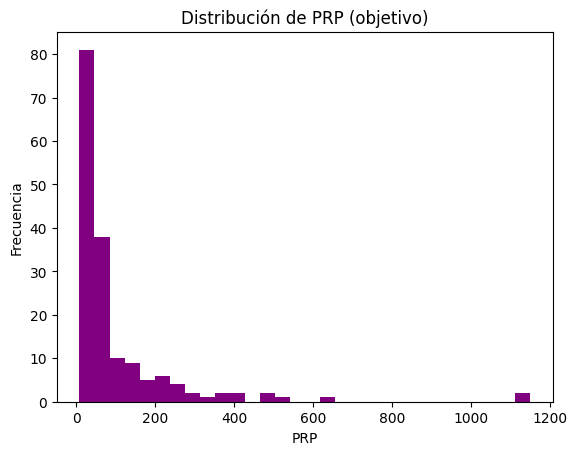

In [22]:
plt.hist(y_train, bins=30,color='purple')
plt.title('Distribución de PRP (objetivo)')
plt.xlabel('PRP')
plt.ylabel('Frecuencia')
plt.show()

Como mi variable objetivo es muy asimétrica, el modelo podría sobreajustarse a esos pocos valores extremos y generalizar peor para el resto. Como tengo que mostrar un caso donde el modelo se sobreajuste voy a dejarlo como está y analizarlo luego.

**MÉTRICAS A UTILIZAR PARA EVALUAR LOS MODELOS:**

* **Error Cuadrático Medio (MSE):** mide cuánto se equivoca el modelo en promedio, penalizando más los errores grandes.

* **Error Absoluto Medio (MAE):** muestra el error promedio sin penalizar tanto los errores grandes.

* **R2 (coeficiente de determinación):** indica qué tan bien el modelo explica los datos. Cuanto más cerca de 1, mejor.

### **MLP + Regresión + Overfitting** 📈

El sobreajuste ocurre cuando el modelo aprende tan bien los datos de entrenamiento que tiene muy bajo error en entrenamiento pero alto error en test, porque no generaliza bien.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hiperparámetros: hidden_layers=(6,), alpha=0.001
  - Error de entrenamiento: MSE=24702.00, MAE=86.32, R²=0.00
  - Error de prueba:       MSE=31226.93, MAE=99.71, R²=-0.04



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hiperparámetros: hidden_layers=(12,), alpha=0.001
  - Error de entrenamiento: MSE=14667.34, MAE=59.77, R²=0.41
  - Error de prueba:       MSE=18452.15, MAE=70.78, R²=0.38



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hiperparámetros: hidden_layers=(28,), alpha=0.001
  - Error de entrenamiento: MSE=6905.61, MAE=41.15, R²=0.72
  - Error de prueba:       MSE=8816.75, MAE=51.00, R²=0.71



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hiperparámetros: hidden_layers=(50,), alpha=0.001
  - Error de entrenamiento: MSE=3586.54, MAE=31.57, R²=0.85
  - Error de prueba:       MSE=4961.24, MAE=41.59, R²=0.83



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hiperparámetros: hidden_layers=(120,), alpha=0.001
  - Error de entrenamiento: MSE=2422.23, MAE=28.10, R²=0.90
  - Error de prueba:       MSE=4835.64, MAE=41.63, R²=0.84



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hiperparámetros: hidden_layers=(200,), alpha=0.001
  - Error de entrenamiento: MSE=1685.97, MAE=26.61, R²=0.93
  - Error de prueba:       MSE=5247.62, MAE=40.83, R²=0.82



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hiperparámetros: hidden_layers=(300,), alpha=0.001
  - Error de entrenamiento: MSE=1494.99, MAE=26.03, R²=0.94
  - Error de prueba:       MSE=5906.44, MAE=41.23, R²=0.80



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hiperparámetros: hidden_layers=(500,), alpha=0.001
  - Error de entrenamiento: MSE=1269.03, MAE=24.43, R²=0.95
  - Error de prueba:       MSE=6010.47, MAE=40.19, R²=0.80



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hiperparámetros: hidden_layers=(1000,), alpha=0.001
  - Error de entrenamiento: MSE=1019.73, MAE=22.83, R²=0.96
  - Error de prueba:       MSE=6203.80, MAE=40.65, R²=0.79



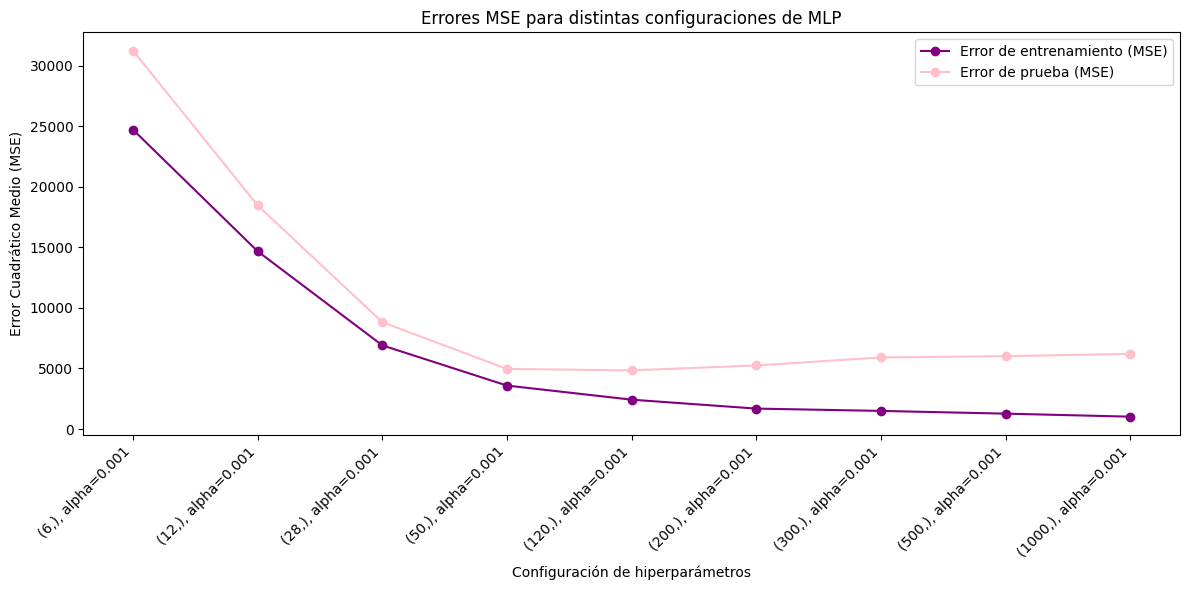

In [23]:
# Función para entrenar y evaluar el MLP con todas las métricas
def train_and_evaluate(hidden_layer_sizes, max_iter=1000, alpha=0.0001):
    mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, alpha=alpha, random_state=42)
    mlp.fit(X_train, y_train)

    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)

    # MSE
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # MAE
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # R2
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    return (train_error, train_mae, train_r2), (test_error, test_mae, test_r2), mlp

# Hiperparámetros
hidden_layers_list = [(6,), (12,), (28,), (50,), (120,), (200,), (300,), (500,), (1000,)]
alpha_value = 0.001

# Resultados
train_results = []
test_results = []

# Ejecutamos y mostramos los resultados
for hidden_layers in hidden_layers_list:
    (train_error, train_mae, train_r2), (test_error, test_mae, test_r2), mlp_model = train_and_evaluate(hidden_layers, alpha=alpha_value)

    train_results.append((hidden_layers, alpha_value, train_error, train_mae, train_r2))
    test_results.append((hidden_layers, alpha_value, test_error, test_mae, test_r2))

    print(f"Hiperparámetros: hidden_layers={hidden_layers}, alpha={alpha_value}")
    print(f"  - Error de entrenamiento: MSE={train_error:.2f}, MAE={train_mae:.2f}, R²={train_r2:.2f}")
    print(f"  - Error de prueba:       MSE={test_error:.2f}, MAE={test_mae:.2f}, R²={test_r2:.2f}\n")

# Gráfico solo con MSE (train_error y test_error)
hidden_layer_labels = [f"{hl}, alpha={alpha_value}" for hl, _, _, _, _ in train_results]
train_error_values = [mse for _, _, mse, _, _ in train_results]
test_error_values = [mse for _, _, mse, _, _ in test_results]

plt.figure(figsize=(12, 6))
x = np.arange(len(hidden_layer_labels))
plt.plot(x, train_error_values, label='Error de entrenamiento (MSE)', marker='o', color='purple')
plt.plot(x, test_error_values, label='Error de prueba (MSE)', marker='o', color='pink')
plt.xticks(x, hidden_layer_labels, rotation=45, ha='right')
plt.xlabel('Configuración de hiperparámetros')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Errores MSE para distintas configuraciones de MLP')
plt.legend()
plt.tight_layout()
plt.show()

Probé diferentes tamaños de red aumentando las neuronas ocultas. A medida que el modelo se vuelve más complejo, el error en entrenamiento baja mucho, llegando a un R2 de 0.96 con (1000,). Sin embargo, el error en prueba comienza a subir levemente a partir de (120,), y el R² baja a 0.79 con (1000,). Esto muestra que el modelo empieza a sobreajustar: aprende muy bien el entrenamiento, pero pierde capacidad de generalizar.



### **MLP + Regresión + Underfitting** 📈

Subajuste es cuando la red neuronal no tiene suficiente capacidad para aprender correctamente del entrenamiento, y por eso los errores son altos tanto en entrenamiento como en prueba.



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hiperparámetros: hidden_layers=(1,), alpha=1
  - Error de entrenamiento: MSE=30070.34, MAE=94.52, R²=-0.22
  - Error de prueba:       MSE=37652.87, MAE=108.84, R²=-0.26



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hiperparámetros: hidden_layers=(3,), alpha=1
  - Error de entrenamiento: MSE=34851.40, MAE=100.40, R²=-0.41
  - Error de prueba:       MSE=43614.70, MAE=116.59, R²=-0.45



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hiperparámetros: hidden_layers=(6,), alpha=1
  - Error de entrenamiento: MSE=24702.01, MAE=86.32, R²=0.00
  - Error de prueba:       MSE=31226.95, MAE=99.71, R²=-0.04



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hiperparámetros: hidden_layers=(9,), alpha=1
  - Error de entrenamiento: MSE=24288.20, MAE=81.40, R²=0.02
  - Error de prueba:       MSE=30237.59, MAE=94.21, R²=-0.01



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hiperparámetros: hidden_layers=(12,), alpha=1
  - Error de entrenamiento: MSE=14633.29, MAE=59.73, R²=0.41
  - Error de prueba:       MSE=18406.33, MAE=70.71, R²=0.39



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hiperparámetros: hidden_layers=(20,), alpha=1
  - Error de entrenamiento: MSE=13560.77, MAE=55.71, R²=0.45
  - Error de prueba:       MSE=17127.66, MAE=65.46, R²=0.43



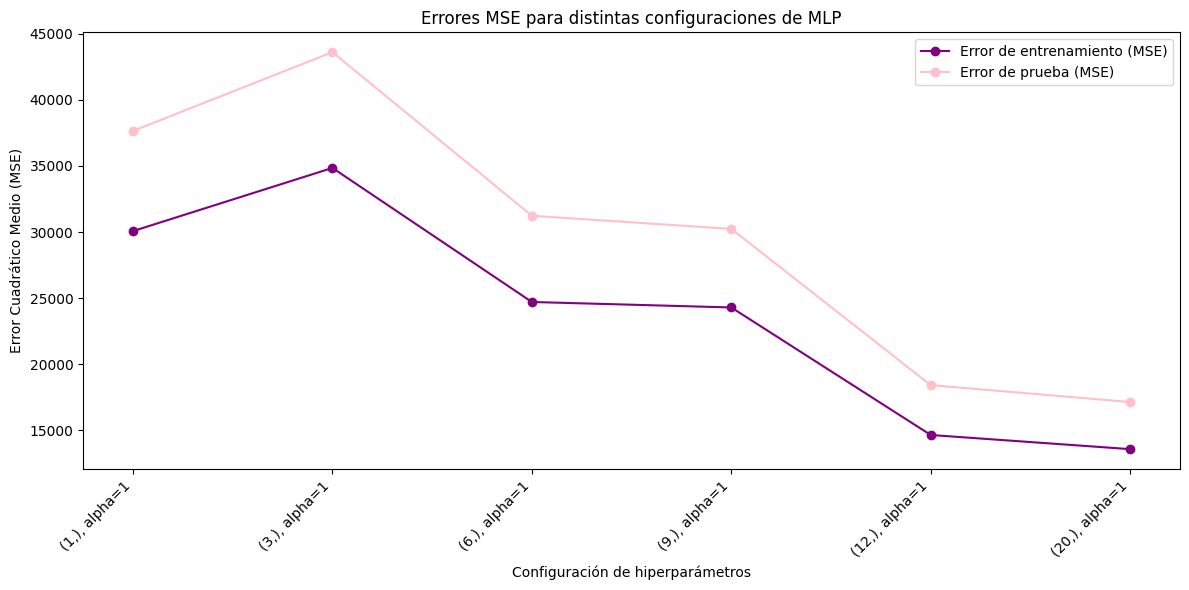

In [28]:
# Función para entrenar y evaluar el MLP con todas las métricas
def train_and_evaluate(hidden_layer_sizes, max_iter=1000, alpha=1):
    mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, alpha=alpha, random_state=42)
    mlp.fit(X_train, y_train)

    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)

    # MSE
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # MAE
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # R2
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    return (train_error, train_mae, train_r2), (test_error, test_mae, test_r2), mlp

# Defino hiperparámetros para analizar el comportamiento del modelo y el subajuste
hidden_layers_list = [(1,),(3,),(6,), (9,), (12,),(20,)] #Reduzco las capaz ocultas
alpha_value = 1 #aumento este parametro
max_iter_value = 300  # Pocas iteraciones

# Resultados
train_results = []
test_results = []

# Ejecutamos y mostramos los resultados
for hidden_layers in hidden_layers_list:
    (train_error, train_mae, train_r2), (test_error, test_mae, test_r2), mlp_model = train_and_evaluate(hidden_layers, alpha=alpha_value)

    train_results.append((hidden_layers, alpha_value, train_error, train_mae, train_r2))
    test_results.append((hidden_layers, alpha_value, test_error, test_mae, test_r2))

    print(f"Hiperparámetros: hidden_layers={hidden_layers}, alpha={alpha_value}")
    print(f"  - Error de entrenamiento: MSE={train_error:.2f}, MAE={train_mae:.2f}, R²={train_r2:.2f}")
    print(f"  - Error de prueba:       MSE={test_error:.2f}, MAE={test_mae:.2f}, R²={test_r2:.2f}\n")

# Gráfico solo con MSE (train_error y test_error)
hidden_layer_labels = [f"{hl}, alpha={alpha_value}" for hl, _, _, _, _ in train_results]
train_error_values = [mse for _, _, mse, _, _ in train_results]
test_error_values = [mse for _, _, mse, _, _ in test_results]

plt.figure(figsize=(12, 6))
x = np.arange(len(hidden_layer_labels))
plt.plot(x, train_error_values, label='Error de entrenamiento (MSE)', marker='o', color='purple')
plt.plot(x, test_error_values, label='Error de prueba (MSE)', marker='o', color='pink')
plt.xticks(x, hidden_layer_labels, rotation=45, ha='right')
plt.xlabel('Configuración de hiperparámetros')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Errores MSE para distintas configuraciones de MLP')
plt.legend()
plt.tight_layout()
plt.show()

Se puede ver que tanto el error de entrenamiento como el de prueba son altos, especialmente en los modelos más simples como (1,) o (3,). Esto significa que el modelo no está aprendiendo bien ni siquiera con los datos que ya conoce.

A medida que se aumentan las neuronas, los errores bajan, lo que indica que el modelo mejora. Por eso, puedo decir que al principio hay subajuste, porque la red es demasiado simple para captar bien los datos.




### **MLP Aceptable + Regresión** 📈


In [25]:
# Hiperparámetros seleccionados
hidden_layers_aceptable = (50,)
alpha_aceptable = 0.001

# Entreno y obtengo métricas
(train_mse, train_mae, train_r2), (test_mse, test_mae, test_r2), mlp_model = train_and_evaluate(hidden_layers_aceptable, alpha=alpha_aceptable)

print(f"Hiperparámetros: hidden_layers={hidden_layers_aceptable}, alpha={alpha_aceptable}")
print(f"  - Error de entrenamiento: MSE={train_mse:.2f}, MAE={train_mae:.2f}, R²={train_r2:.2f}")
print(f"  - Error de prueba:       MSE={test_mse:.2f}, MAE={test_mae:.2f}, R²={test_r2:.2f}\n")

Hiperparámetros: hidden_layers=(50,), alpha=0.001
  - Error de entrenamiento: MSE=3586.54, MAE=31.57, R²=0.85
  - Error de prueba:       MSE=4961.24, MAE=41.59, R²=0.83



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
# Hiperparámetros seleccionados
hidden_layers_aceptable = (60,)
alpha_aceptable = 0.001

# Entreno y obtengo métricas
(train_mse, train_mae, train_r2), (test_mse, test_mae, test_r2), mlp_model = train_and_evaluate(hidden_layers_aceptable, alpha=alpha_aceptable)

print(f"Hiperparámetros: hidden_layers={hidden_layers_aceptable}, alpha={alpha_aceptable}")
print(f"  - Error de entrenamiento: MSE={train_mse:.2f}, MAE={train_mae:.2f}, R²={train_r2:.2f}")
print(f"  - Error de prueba:       MSE={test_mse:.2f}, MAE={test_mae:.2f}, R²={test_r2:.2f}\n")

Hiperparámetros: hidden_layers=(60,), alpha=0.001
  - Error de entrenamiento: MSE=3422.66, MAE=30.68, R²=0.86
  - Error de prueba:       MSE=4736.29, MAE=41.05, R²=0.84



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Probé varias configuraciones y encontré que con 60 neuronas en la capa oculta y un alpha de 0.001, la red neuronal tiene un comportamiento equilibrado.
En este caso:

* El error en entrenamiento es bajo, lo que indica que el modelo aprendió bien los datos.

* El error en prueba también es relativamente bajo, y la diferencia entre ambos errores no es grande.

* Tambien se puede obervar que el R2 esta relativamente cerca del 1 y muy similar en ambos casos

Esto me muestra que el modelo no está sobreajustado ni subajustado.
Por eso, considero que esta configuración funciona de forma aceptable, ya que logra un buen rendimiento sin perder capacidad de generalización.

# 📌**Observaciones Finales**

El trabajo de redes neuronales me parecio muy interesante. La verdad que ami me cuesta la parte de código pero soy fuerte en el área de analisis entonces he disfrutado poder comparar los distintos resultados, buscar el punto óptimo.

Tambien he notado como finalizando la materia teniendo mayor conocimiento voy entendiendo de mejor manera y eso me agrada mucho. Me costo mucho comenzar el trabajo ya que no me orientaba a como arrancar con redes neuronales asi que espero haberlo entendido. Si algo esta mal o incompleto me encantaria la retroalimentacion constructiva para poder aplicarlo.

En mi caso volvi a analizar el primer TP ya que al ir aprendiendo nuevas cosas corregi puntos que me parecian clave en especial en la etapa de preprocesamiento.

### ANALISIS COMPARATIVO:

* En el **TP1 con Regresion Lineal** el R2 me dio 0.88 en entrenamiento y 0.76 en test.
* En el **TP4 con Redes Neuronales** el R2 en el punto optimo me dio 0.86 en el entrenamiento y 0.84 en el test.

Por la complejidad y el costo que implica entrenar Redes Neuronales creo que sería mejor retomar RL pero aplicando un previo trabajo en los outliers para intentar mejorar los resultados.

Quiero aclarar que, para tomar una decisión definitiva, me faltaría realizar un análisis más profundo y capacitarme mejor en ambos métodos, lo cual me hará mas capaz a la hora de evaluar con mayor precisión sus ventajas y desventajas en este caso específico.

# RECURSOS:

* Codigo y videos de clases
* [UC Irvine](https://archive.ics.uci.edu/)
* ChatGpt

